In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
input_df = pd.read_csv('../processed/input_cleaned_w1_2_3.csv')
output_df = pd.read_csv('../processed/output_cleaned_w1_2_3.csv')


In [43]:
input_df['player_role'].unique()


array(['Defensive Coverage', 'Other Route Runner', 'Targeted Receiver'],
      dtype=object)

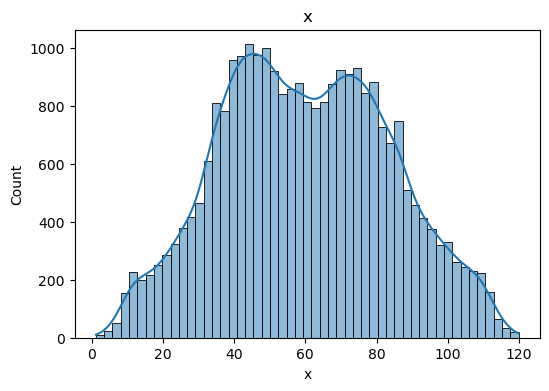

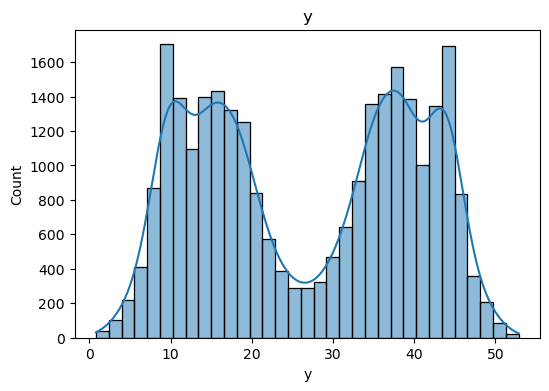

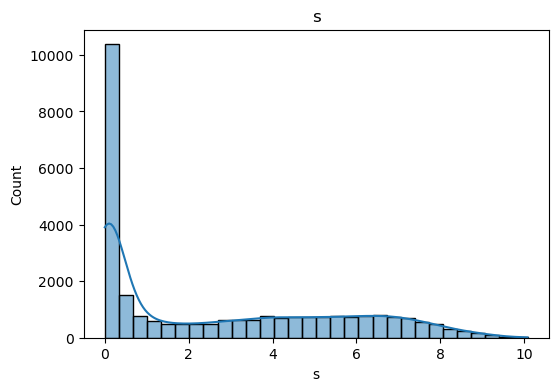

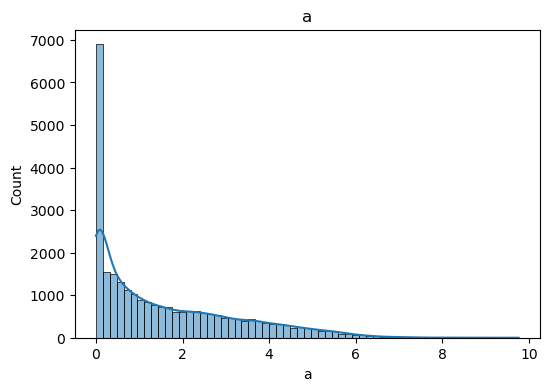

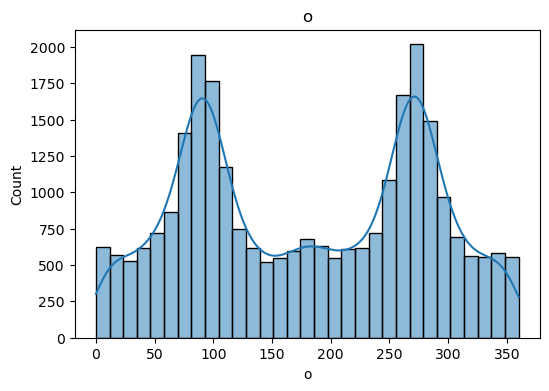

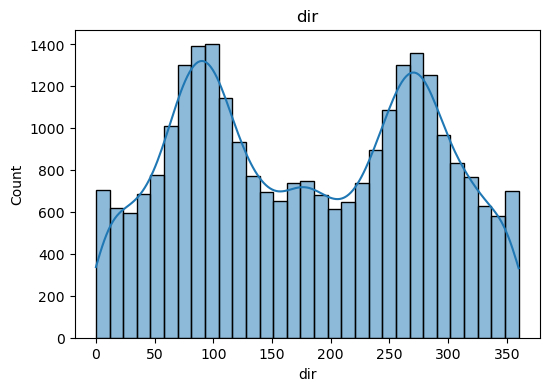

In [44]:
columns_to_check = ["x", "y", "s", "a", "o", "dir"]

for col in columns_to_check:
    plt.figure(figsize=(6,4))
    sns.histplot(input_df[col], kde=True)
    plt.title(col)
    plt.show()

In [45]:
input_df[columns_to_check].describe()

,x,y,s,a,o,dir
count,27221.000000,27221.000000,27221.000000,27221.000000,27221.000000,27221.000000
mean,60.093522,26.811204,2.707570,1.557781,179.947331,179.407703
std,23.626836,13.180310,2.833268,1.618013,99.747952,100.646531
min,1.210000,0.800000,0.000000,0.000000,0.000000,0.010000
25%,42.270000,14.560000,0.060000,0.150000,90.350000,90.750000
50%,59.320000,27.650000,1.570000,0.990000,180.470000,177.290000
75%,77.620000,38.790000,5.200000,2.570000,270.590000,269.390000
max,119.860000,52.870000,10.080000,9.760000,360.000000,360.000000


In [46]:
#no null values so no feature gaps

input_df[columns_to_check].isna().sum()

x      0
y      0
s      0
a      0
o      0
dir    0
dtype: int64

In [47]:
output_df.describe()

,game_id,play_id,nfl_id,frame_id,x,y,season,week,pass_length,yards_gained,expected_points,expected_points_added
count,7.968000e+03,7968.000000,7968.000000,7968.000000,7968.000000,7968.000000,7968.0,7968.000000,7968.000000,7968.000000,7968.000000,7968.000000
mean,2.023092e+09,2232.304342,49860.849900,6.796436,60.072066,25.977455,2023.0,2.056476,11.859438,8.868850,2.056322,0.306532
std,5.855808e+02,1266.868255,5209.053693,7.202759,24.960993,15.055259,0.0,0.821955,10.340291,11.100124,1.547662,1.695096
min,2.023091e+09,55.000000,37078.000000,1.000000,0.040000,0.380000,2023.0,1.000000,-8.000000,-22.000000,-1.905059,-9.082922
25%,2.023091e+09,1190.000000,45287.000000,1.000000,42.580000,12.330000,2023.0,1.000000,5.000000,0.000000,0.941243,-0.687970
50%,2.023092e+09,2186.000000,52442.000000,1.000000,59.505000,24.325000,2023.0,2.000000,9.000000,6.000000,1.839273,0.186767
75%,2.023092e+09,3289.750000,54514.000000,11.000000,77.210000,39.980000,2023.0,3.000000,16.000000,13.000000,3.123088,1.326763
max,2.023093e+09,4974.000000,56547.000000,94.000000,120.830000,53.720000,2023.0,3.000000,65.000000,72.000000,6.474856,6.685437


In [48]:
#2 null values in output_df so minimal gaps
output_df.isna().sum()

game_id                       0
play_id                       0
nfl_id                        0
frame_id                      0
x                             0
y                             0
season                        0
week                          0
pass_result                   0
pass_length                   0
route_of_targeted_receiver    2
team_coverage_man_zone        0
yards_gained                  0
expected_points               0
expected_points_added         0
dtype: int64

In [49]:
output_df[output_df['route_of_targeted_receiver'].isna()]

,game_id,play_id,nfl_id,frame_id,x,y,season,week,pass_result,pass_length,route_of_targeted_receiver,team_coverage_man_zone,yards_gained,expected_points,expected_points_added
427,2023091705,292,46456,1,84.88,18.95,2023,2,C,0,NaN,ZONE_COVERAGE,0,0.397123,-1.974073
428,2023091705,292,46456,7,84.43,19.05,2023,2,C,0,NaN,ZONE_COVERAGE,0,0.397123,-1.974073


Feature Review Summary:

Speed values mostly between 0–9 yds/s → reasonable

Acceleration looks good too

Orientation (o) is in radians from 0–360 → distribution is bimodal, probably depending on y (if at top of field, higher chance of looking right)

Direction (dir) same as orientation

Missing key features:

- WR–DB separation
- Angle to ball landing spot
- Velocity components
- Turning rate
- Acceleration direction

These will be engineered in the next step.